C:\Users\mojta\AppData\Local\Temp\ipykernel_22880\3882360995.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
c:\Users\mojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


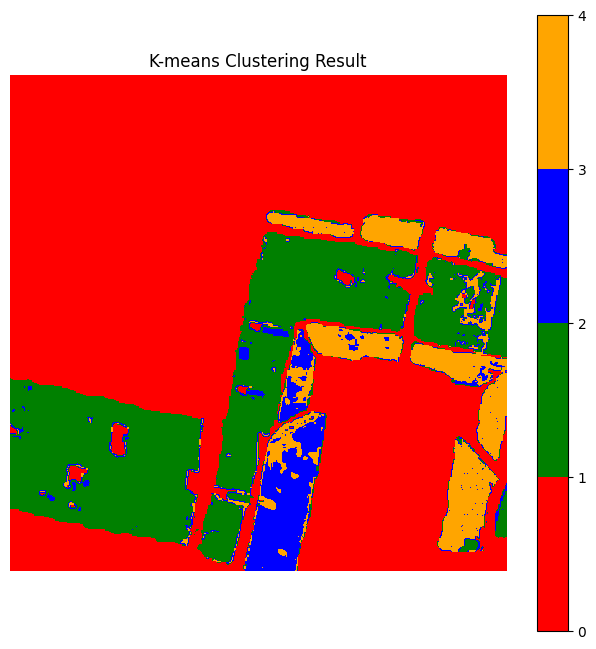

In [20]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

# Load the PNG image
image_path = 'C:\\Users\\mojta\\Downloads\\FirstCutOut.png'
image = imageio.imread(image_path)

# Get the shape of the image and reshape it for clustering
height, width, channels = image.shape
pixels = image.reshape(-1, channels)

# Perform K-means clustering
num_clusters = 5  # You can adjust this to change the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(pixels)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Reshape the labels to match the original image shape
clustered_image = labels.reshape(height, width)


colors = ['red', 'green', 'blue', 'orange']  # Define colors for each class
cmap = mcolors.ListedColormap(colors)

bounds = np.arange(np.min(clustered_image), np.max(clustered_image) + 1, 1)  # Define class boundaries
norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=cmap.N, clip=False)

# Create a visualization of the clustered image
plt.figure(figsize=(8, 8))
plt.imshow(clustered_image, cmap=cmap, norm=norm)
# Create a colorbar to show the color mapping
cbar = plt.colorbar()


plt.title('K-means Clustering Result')
plt.axis('off')
plt.savefig('./data/sample_clustering_results.png')
plt.show()



In [6]:
type(cluster_centers)

numpy.ndarray

In [8]:
np.unique(clustered_image)

array([0, 1, 2, 3, 4])

In [22]:
picked_class_pixels = np.count_nonzero(clustered_image == 1)
picked_class_pixels




33359

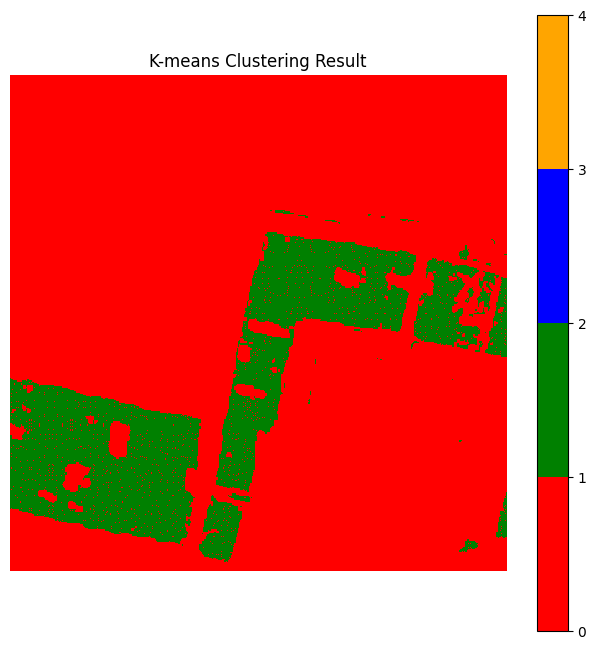

In [24]:
# Replace any value except 1 with zero
clustered_image_masked = (clustered_image == 1.0).astype(int)
clustered_image_masked


# Create a visualization of the clustered image
plt.figure(figsize=(8, 8))
plt.imshow(clustered_image_masked,  cmap = cmap, norm=norm)
# Create a colorbar to show the color mapping
cbar = plt.colorbar()


plt.title('K-means Clustering Result')
plt.axis('off')
plt.savefig('./data/sample_clustering_results.png')
plt.show()

at zoom level 20 in Google Maps, approximately 0.0089 pixels represent 1 square meter

SQM of a roof based on the number of pixels: number of pixels x 0.0089

In [4]:
estmiation_of_size = round(picked_class_pixels * 0.0089,2)
print(f'estimated applicable size of this address is {estmiation_of_size} sqm.')

estimated applicable size of this address is 296.9 sqm.


#### fit the solar panels to the applicable aream

In [26]:
import numpy as np
import cv2

def pack_rectangles(image, rectangle_size):
    """
    Pack as many rectangles of fixed size as possible inside a shape.

    Parameters:
    image (numpy.ndarray): Binary mask of the shape where 1 represents the shape.
    rectangle_size (tuple): Tuple specifying the width and height of the rectangles.

    Returns:
    numpy.ndarray: Image with packed rectangles.
    """
    # Ensure the input image is binary (0 or 1)
    image = image.astype(np.uint8)

    # Create a copy of the input image
    result_image = image.copy()

    # Get the dimensions of the image
    height, width = result_image.shape

    # Get the dimensions of the rectangles
    rect_width, rect_height = rectangle_size

    # Attempt to pack rectangles
    for y in range(0, height, rect_height):
        for x in range(0, width, rect_width):
            # Check if there's enough space for a rectangle
            if np.all(result_image[y:y + rect_height, x:x + rect_width] == 0):
                result_image[y:y + rect_height, x:x + rect_width] = 1

    return result_image

# Example usage:
# Create a binary mask for the shape (1 represents the shape)
shape = np.zeros((400, 400), dtype=np.uint8)
cv2.rectangle(shape, (50, 50), (350, 350), 1, -1)  # Draw a rectangle as an example

# Define the size of the rectangles
rectangle_size = (40, 40)

# Pack rectangles inside the shape
result_image = pack_rectangles(shape, rectangle_size)

# Display or save the resulting image
cv2.imshow('Resulting Image', result_image * 255)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [27]:
result_image

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)